In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB


import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras.models import Sequential
from keras.layers import Dense #Y = Wx+b
from keras.layers import Flatten #converts multidimensional image to a vector
from keras.layers import Dropout
from keras.layers import Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint #for saving models after certain epochs
from keras.optimizers import SGD, Adam, RMSprop

In [ ]:
df = pd.read_csv('data.csv')

# Exploratory Data Analysis
1) How many features?

2) How many data records?

3) Are there any missing/duplicate values?

4) What are the target distribution?

In [ ]:
#Objective: detect the gender of wrestler. Target = gender
df.head()

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [ ]:
#Dimension of the dataset
print(f"Dataset dimension: {df.shape}\n")
#Data types of the fields
print(f"Datatype: \n{df.dtypes}\n")
#Number of data records
print(f"Number of records: {df.shape[0]}")
#Number of features in the dataset excluding target='gender' and index='Unnamed: 0'
print(f'Number of features: {df.shape[1] - 2}')

Dataset dimension: (500, 15)

Datatype: 
Unnamed: 0         int64
name              object
gender            object
age                int64
height           float64
nationality       object
weight             int64
sports            object
hours_per_day      int64
strength           int64
agility            int64
mental             int64
federation        object
year_start         int64
rank               int64
dtype: object

Number of records: 500
Number of features: 13


In [ ]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   name           500 non-null    object 
 2   gender         500 non-null    object 
 3   age            500 non-null    int64  
 4   height         500 non-null    float64
 5   nationality    500 non-null    object 
 6   weight         500 non-null    int64  
 7   sports         500 non-null    object 
 8   hours_per_day  500 non-null    int64  
 9   strength       500 non-null    int64  
 10  agility        500 non-null    int64  
 11  mental         500 non-null    int64  
 12  federation     500 non-null    object 
 13  year_start     500 non-null    int64  
 14  rank           500 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 58.7+ KB


In [ ]:
#Summary statistics of continuous features
df.describe()

,Unnamed: 0,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,249.500000,31.154000,174.864000,89.688000,3.064000,6.152000,7.148000,6.732000,2007.13000,250.500000
std,144.481833,5.438514,9.468623,11.081889,1.375386,1.567741,1.455449,1.197934,6.32591,144.481833
min,0.000000,18.000000,152.000000,65.000000,0.000000,2.000000,3.000000,3.000000,1986.00000,1.000000
25%,124.750000,27.000000,167.500000,81.000000,2.000000,5.000000,6.000000,6.000000,2003.00000,125.750000
50%,249.500000,31.000000,174.000000,89.000000,3.000000,6.000000,7.000000,7.000000,2007.00000,250.500000
75%,374.250000,35.000000,181.625000,98.000000,4.000000,7.000000,8.000000,8.000000,2011.00000,375.250000
max,499.000000,53.000000,202.000000,123.000000,8.000000,10.000000,10.000000,10.000000,2021.00000,500.000000


In [ ]:
#Checking for missing values
df.isna().sum()

Unnamed: 0       0
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
#Checking the target distribution
df['gender'].value_counts()

Female    265
Male      235
Name: gender, dtype: int64

# Exploratory Data Analysis before train-test split
- How many features: 12 (Name should also be excluded along with Unnamed: 0 and gender)
- How many data records: 500
- Are there any missing/duplicated values: no
- What is the target distribution: 265 Female, 235 Male

In [ ]:
#Dropping features: Unnamed: 0, name, and target from the X dataset
y = df['gender']
x = df.drop(columns = ['Unnamed: 0', 'gender', 'name'])

In [ ]:
x

,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34,185.5,France,104,Judo,2,9,6,5,Consejo Global de Lucha Libre,2008,353
496,31,161.5,France,71,"Judo, Karate, Kick-Boxing, MMA",5,4,9,6,World Wrestling Entertainment,2003,74
497,22,188.5,France,102,Kick-Boxing,3,8,8,7,Consejo Global de Lucha Libre,2021,265
498,32,177.0,France,92,Judo,2,5,5,5,Consejo Global de Lucha Libre,2012,499


In [ ]:
#One-hot encoding categorical features
sport = df['sports'].unique().tolist()
for n in sport:
    print(n)
print(df['nationality'].unique())
print(df['federation'].unique())

Boxing, MMA
Judo
Karate
MMA
Judo, Karate
Karate, Kick-Boxing, MMA
Boxing, Karate
Boxing, Kick-Boxing, MMA
Boxing, Judo, MMA
Boxing, Judo, Kick-Boxing
Boxing, Karate, Kick-Boxing, MMA
Karate, Kick-Boxing
Boxing, Kick-Boxing
Boxing, Judo, Kick-Boxing, MMA
Boxing
Boxing, Judo
Boxing, Karate, Kick-Boxing
Boxing, Judo, Karate, MMA
Judo, Kick-Boxing, MMA
Boxing, Karate, MMA
Boxing, Judo, Karate
Judo, Kick-Boxing
Judo, Karate, Kick-Boxing
Judo, Karate, MMA
Karate, MMA
Kick-Boxing, MMA
Kick-Boxing
Boxing, Judo, Karate, Kick-Boxing
Judo, Karate, Kick-Boxing, MMA
Boxing, Judo, Karate, Kick-Boxing, MMA
Judo, MMA
['England' 'Japan' 'USA' 'France' 'Egypt' 'Australia' 'Argentina' 'India']
['Fight Zone Wrestling' 'World Wrestling Entertainment'
 'Consejo Global de Lucha Libre']


In [ ]:
#One-hot encoding for sports
sports_encoded = df['sports'].str.get_dummies(', ')
sports_encoded

,Boxing,Judo,Karate,Kick-Boxing,MMA
0,1,0,0,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
495,0,1,0,0,0
496,0,1,1,1,1
497,0,0,0,1,0
498,0,1,0,0,0


In [ ]:
nationality_encoded = df['nationality'].str.get_dummies()
nationality_encoded

,Argentina,Australia,Egypt,England,France,India,Japan,USA
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
495,0,0,0,0,1,0,0,0
496,0,0,0,0,1,0,0,0
497,0,0,0,0,1,0,0,0
498,0,0,0,0,1,0,0,0


In [ ]:
federation_encoded = df['federation'].str.get_dummies()
federation_encoded

,Consejo Global de Lucha Libre,Fight Zone Wrestling,World Wrestling Entertainment
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
495,1,0,0
496,0,0,1
497,1,0,0
498,1,0,0


In [ ]:
x = pd.concat([x, sports_encoded, nationality_encoded, federation_encoded], axis=1)

In [ ]:
x.shape

(500, 28)

In [ ]:
#Dropping non-encoded
x = x.drop(columns = ['sports', 'nationality', 'federation'])

In [ ]:
print(x.shape)
print(x.columns)

(500, 25)
Index(['age', 'height', 'weight', 'hours_per_day', 'strength', 'agility',
       'mental', 'year_start', 'rank', 'Boxing', 'Judo', 'Karate',
       'Kick-Boxing', 'MMA', 'Argentina', 'Australia', 'Egypt', 'England',
       'France', 'India', 'Japan', 'USA', 'Consejo Global de Lucha Libre',
       'Fight Zone Wrestling', 'World Wrestling Entertainment'],
      dtype='object')


In [ ]:
#Checking result
x.iloc[:,10:].head()

,Judo,Karate,Kick-Boxing,MMA,Argentina,Australia,Egypt,England,France,India,Japan,USA,Consejo Global de Lucha Libre,Fight Zone Wrestling,World Wrestling Entertainment
0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
df.head()

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [ ]:
#Encoding the target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sum(y)

235

1 is Male, 0 is Female

# Performing train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(400, 25)
(400,)

(100, 25)
(100,)


In [ ]:
#Data visualization of the training dataset
xy_train = x_train.copy()
xy_train['gender'] = y_train
xy_train

,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank,Boxing,...,Egypt,England,France,India,Japan,USA,Consejo Global de Lucha Libre,Fight Zone Wrestling,World Wrestling Entertainment,gender
238,25,178.0,92,3,6,7,6,2011,214,0,...,0,1,0,0,0,0,0,1,0,0
438,34,167.0,82,2,6,8,5,2008,409,0,...,0,0,0,0,0,1,0,1,0,0
475,34,163.5,75,2,4,7,5,2004,431,0,...,0,0,0,0,1,0,0,0,1,0
58,24,198.5,117,3,9,4,7,2015,373,0,...,0,0,1,0,0,0,1,0,0,1
380,25,176.0,94,2,10,7,7,2011,170,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,29,170.0,87,3,5,8,8,2009,273,1,...,0,0,0,0,0,1,0,0,1,0
72,44,177.0,93,2,8,8,7,1993,29,0,...,0,0,0,0,0,1,0,1,0,1
396,24,167.5,80,3,6,7,6,2009,423,1,...,0,0,0,0,0,1,0,1,0,0
235,27,175.5,87,6,5,9,7,2006,19,0,...,0,0,1,0,0,0,0,0,1,1


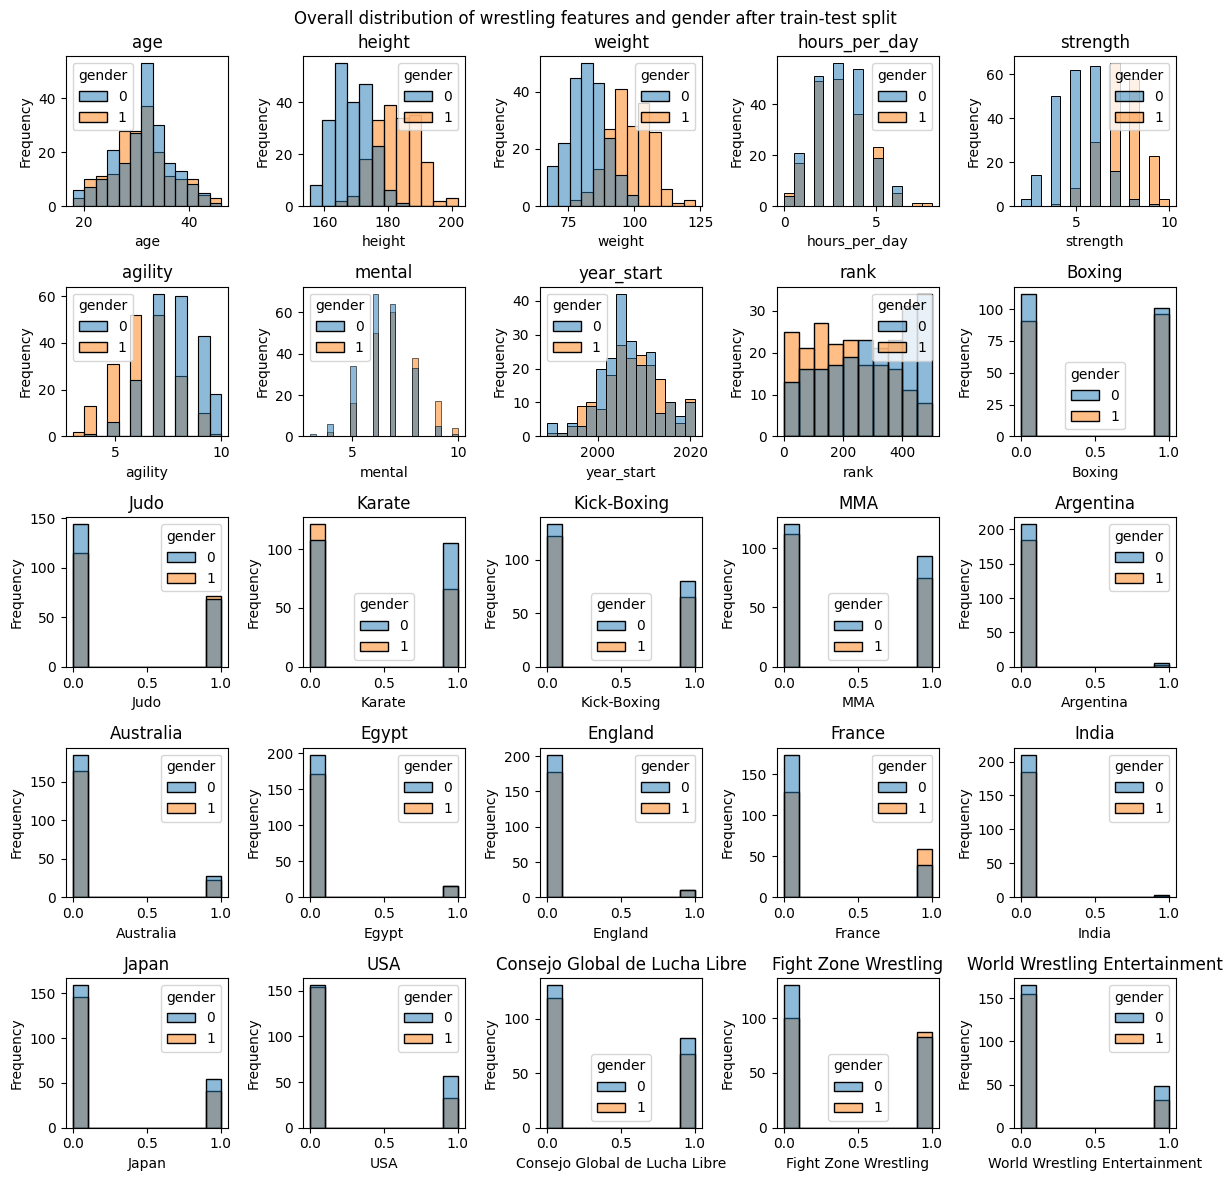

In [ ]:
#Data visualization of the training dataset
features = xy_train.columns.tolist()[:-1]
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=xy_train, x=feature, hue='gender', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"{feature}")

plt.suptitle('Overall distribution of wrestling features and gender after train-test split')
plt.tight_layout()
plt.show()

Observing the histograms/bar chart, some features seems to be indicative of the gender of the wrestler. For instance, it seems that Males have higher weight and height distribution as compared to Females.

# Performing Simple Neural Network classifier with 1 hidden layer

In [ ]:
x_train.shape

(400, 25)

In [ ]:
model = Sequential()

#Hidden layer 1, 100 neurons
model.add(Dense(100, input_shape = (25,)))
model.add(Activation('relu'))

model.add(Dense(1)) #1 output neuron
model.add(Activation('sigmoid')) #sigmoid for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #Binary cross entropy for binary classification
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
checkpoint = ModelCheckpoint('NN_Wrestling{epoch:02d}.h5')
epochs = 10

#Model training
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=16, callbacks =[checkpoint]) #Lower batch_size as small dataset

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 29.9257 - accuracy: 0.4844 - val_loss: 7.9961 - val_accuracy: 0.3125
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 5.5680 - accuracy: 0.5063 - val_loss: 1.7000 - val_accuracy: 0.5375
Epoch 3/10
 1/20 [>.............................] - ETA: 0s - loss: 1.8236 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 0s 5ms/step - loss: 1.3052 - accuracy: 0.6406 - val_loss: 1.9582 - val_accuracy: 0.5375
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.7498 - accuracy: 0.7500 - val_loss: 0.4041 - val_accuracy: 0.8250
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4188 - accuracy: 0.8094 - val_loss: 0.3873 - val_accuracy: 0.8000
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.8094 - val_loss: 0.3804 - val_accuracy: 0.8000
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8250 - val_loss: 0.7103 - val_accuracy: 0.6750
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8344 - val_loss: 0.3171 - val_accuracy: 0.8875
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8156 - val_loss: 0.5674 - val_accuracy: 0.7375
Epoch 10/10
20/20 [============

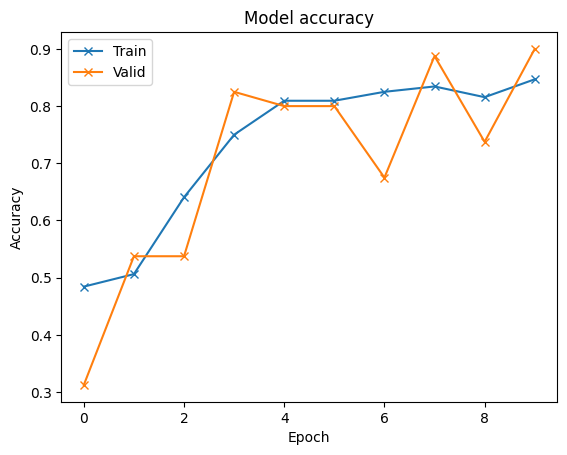

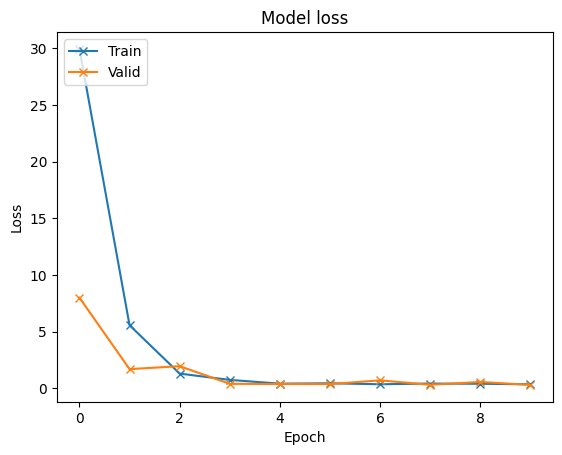

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'x-')
plt.plot(history.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x-')
plt.plot(history.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
# from google.colab import files
# files.download('NN_Wrestling10.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

One possibility of such weird training and testing curve observed could be due to the small dataset, resulting in poor generalization to the unseen data.

In [ ]:
#Selecting the model that gives the best validation accuracy
model.load_weights("NN_Wrestling10.h5")

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.4f" % (scores[0]))

Accuracy: 83.00%
Loss: 0.4273


In [ ]:
nn_pred = model.predict(x_test)
nn_pred = np.round(nn_pred)

4/4 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.83      0.85      0.84        52
           1       0.83      0.81      0.82        48

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



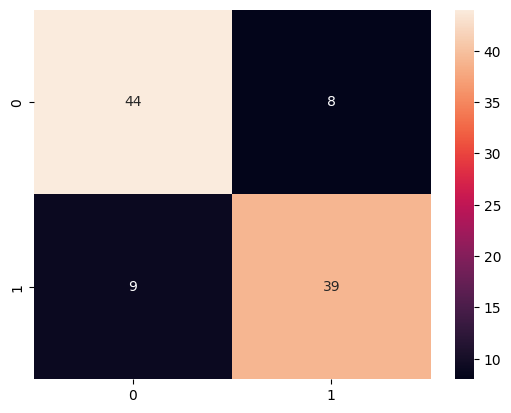

In [ ]:
cr = classification_report(y_test, nn_pred)
cm = confusion_matrix(y_test, nn_pred)
print(cr)

#0 is Female, 1 is Male
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
#Building a naive bayes classifier for comparison
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

In [ ]:
nb_accuracy = accuracy_score(nb_pred, y_test)
print(nb_accuracy)

0.89


              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.89      0.88      0.88        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



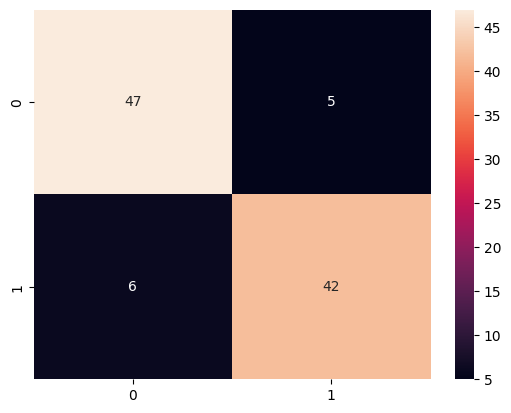

In [ ]:
print(classification_report(y_test, nb_pred))
cm2 = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()
#0 is Female, 1 is Male

The Naive Bayes model outperforms the unoptimized Simple Neural Network model.
- Accuracy (89% vs 83%)
- Female Precision (89% vs 83%). Female Recall (90% vs 85%)
- Male Precision (89% vs 83%). Male Recall (88% vs 81%)

Therefore, the parameters of the simple neural network model will be optimized.

In [ ]:
#Increasing the number of neurons 100 -> 512
#Learning rate set to 0.001

model2 = Sequential()

#Hidden layer 1, 512 neurons
model2.add(Dense(512, input_shape = (25,)))
model2.add(Activation('relu'))

model2.add(Dense(1)) #1 output neuron
model2.add(Activation('sigmoid')) #sigmoid for binary classification

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) #Binary cross entropy for binary classification
print(model2.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               13312     
                                                                 
 activation_43 (Activation)  (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 1)                 513       
                                                                 
 activation_44 (Activation)  (None, 1)                 0         
                                                                 
Total params: 13825 (54.00 KB)
Trainable params: 13825 (54.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Epoch increase to 20
#Batch size increase to 32
checkpoint = ModelCheckpoint('NN_2_Wrestling{epoch:02d}.h5')
epochs = 20

#Model training
history2 = model2.fit(x_train, y_train, validation_split=0.1, epochs=epochs, batch_size=32, callbacks =[checkpoint])

Epoch 1/20
12/12 [==============================] - 0s 13ms/step - loss: 0.3959 - accuracy: 0.8722 - val_loss: 1.8449 - val_accuracy: 0.6750
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 0.7679 - accuracy: 0.8056 - val_loss: 0.3532 - val_accuracy: 0.9000
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.8361 - val_loss: 0.3650 - val_accuracy: 0.9000
Epoch 4/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 0s 8ms/step - loss: 0.6149 - accuracy: 0.8583 - val_loss: 0.3439 - val_accuracy: 0.9000
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.9000 - val_loss: 0.4058 - val_accuracy: 0.8500
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.8556 - val_loss: 0.3123 - val_accuracy: 0.9000
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.8944 - val_loss: 0.3330 - val_accuracy: 0.9000
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.8917 - val_loss: 0.7289 - val_accuracy: 0.8000
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 0.9416 - accuracy: 0.7833 - val_loss: 1.4751 - val_accuracy: 0.6750
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7303 - accuracy: 0.8250 - val_loss: 0.4678 - val_accuracy: 0.8750
Epoch 11/20
12/12 [===========

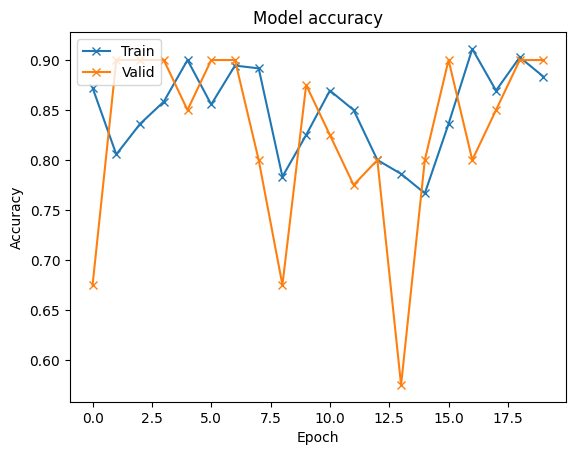

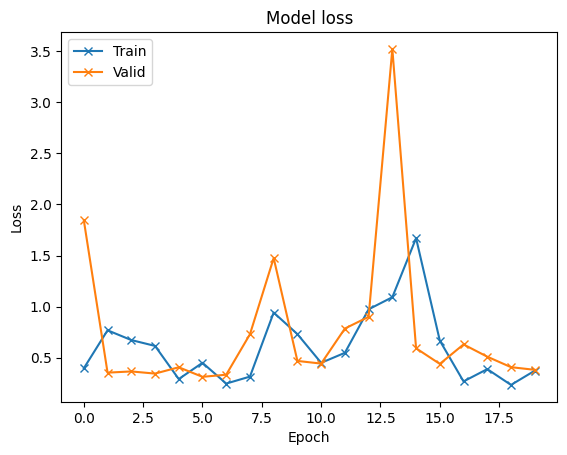

In [ ]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'],'x-')
plt.plot(history2.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'],'x-')
plt.plot(history2.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
#Selecting the model that gives the best validation accuracy, model 8
model2.load_weights("NN_2_Wrestling20.h5")

scores2 = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))
print("Loss: %.4f" % (scores2[0]))

Accuracy: 89.00%
Loss: 0.5029


In [ ]:
# from google.colab import files
# files.download('NN_2_Wrestling20.h5') #89%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nn2_pred = model2.predict(x_test)
nn2_pred = np.round(nn2_pred)

4/4 [==============================] - 0s 3ms/step


Parameter tuned Neural Network
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.89      0.88      0.88        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



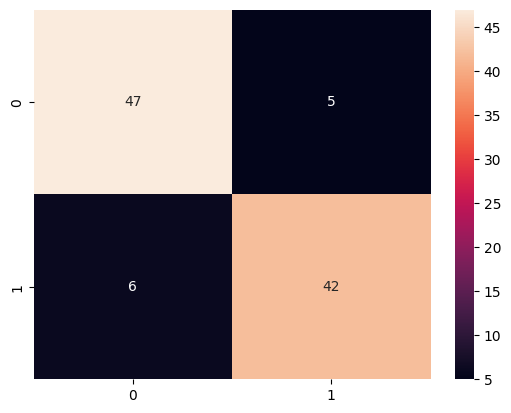

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.89      0.88      0.88        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



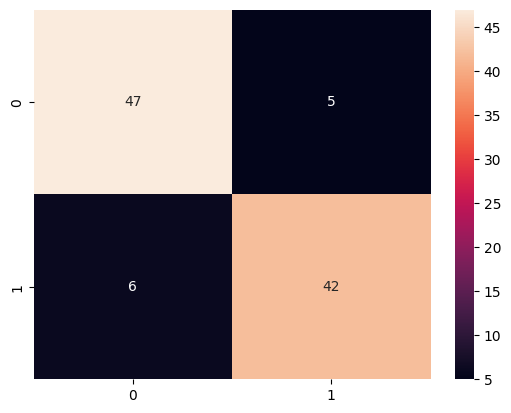

In [ ]:
cr3 = classification_report(y_test, nn2_pred)
cm3 = confusion_matrix(y_test, nn2_pred)
print('Parameter tuned Neural Network')
print(cr3)
#0 is Female, 1 is Male
sns.heatmap(cm3, annot=True, fmt='d')
plt.show()

print('Naive Bayes')
print(classification_report(y_test, nb_pred)) #Naive bayes prediction
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()

Comparing the Naive Bayes and the parameter tuned neural network, the confusion matrix and classification report generated identical performance.

## Performance Evaluation

- Female precision (89%)
- Female recall (90%)
- Male precision (89%)
- Male recall (88%)
- Overall accuracy (89%)

Both models have a low misclassification rate for Males and Females wrestlers observed in the precision which measures the number of correct predicted genders out of the total predicted gender for that class and recall which measures the number of correctly predicted gender against the actual gender. Therefore, both models can be deployed in this case as there is no huge penalty for a wrong misclassification unlike a medical scenario.

## Parameters Adjustment
The following actions was done to the original neural network model
- The Dense value is increased to 512: this increases the computational complexity as the model learns more complex patterns in the data.
- The learning rate can be set to 0.001: The learning rate value allows the optimization process to converge depending on the value set.
- Batch size increased to 32: This allows the model to process more samples in parallel during training. It may be useful to improve the performance of a small dataset.
- Epoch increased to 20: This allows the model to see the entire dataset multiple times to better learn and generalize to unseen data.

As the dataset is small, these values involves experimentation and observing the model's performance on the validation dataset multiple times.